In [1]:
import sys
sys.path.append(r'C:\Users\mha114\Dropbox\Python\massimal\tools')
# sys.path.append("/tf/massimal/python/massimal/tools")

In [2]:
import json
import pathlib
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import sklearn.decomposition
import sklearn.preprocessing
import hyspec_io, misc, hyspec_stats

In [3]:
# Paths
# hyspec_dir = pathlib.Path(r'/media/mha114/Massimal/Bodo_Juvika/Hyperspectral/20220624/Area/2_R_rs')
hyspec_dir = pathlib.Path(r'/media/mha114/Massimal/Bodo_Juvika/Hyperspectral/20220624/Area/2c_R_rs_derivative')
pca_model_path = pathlib.Path(r'/media/mha114/Massimal/Bodo_Juvika/Hyperspectral/20220624/Area/M_PcaModel_Derivative/pca_model.npz')

In [4]:
# Parameters
training_image_numbers = [13,20,21,24,25,30,31]

In [5]:
hyspec_image_paths = []
for im_num in training_image_numbers:
    hyspec_image_paths.append(list(hyspec_dir.glob('*_'+str(im_num)+'-*.hdr'))[0])

In [6]:
X_list = []
for image_path in hyspec_image_paths:
    print(str(image_path.name))
    image,_,_,_ = hyspec_io.load_envi_image(str(image_path))
    X_list.append(hyspec_stats.random_sample_image(image,frac=0.2))

Juvika_June2022_Pika_L_13-Crop Wavelengths-Savitzky-Golay Smoothing.bip.hdr
Juvika_June2022_Pika_L_20-Crop Wavelengths-Savitzky-Golay Smoothing.bip.hdr
Juvika_June2022_Pika_L_21-Crop Wavelengths-Savitzky-Golay Smoothing.bip.hdr
Juvika_June2022_Pika_L_24-Crop Wavelengths-Savitzky-Golay Smoothing.bip.hdr
Juvika_June2022_Pika_L_25-Crop Wavelengths-Savitzky-Golay Smoothing.bip.hdr
Juvika_June2022_Pika_L_30-Crop Wavelengths-Savitzky-Golay Smoothing.bip.hdr
Juvika_June2022_Pika_L_31-Crop Wavelengths-Savitzky-Golay Smoothing.bip.hdr


In [7]:
X = np.concatenate(X_list)

In [8]:
scaler = sklearn.preprocessing.StandardScaler()
X_norm = scaler.fit_transform(X)

In [9]:
# Create preliminary PCA model
pca = sklearn.decomposition.PCA(n_components=30)
_ = pca.fit(X_norm)

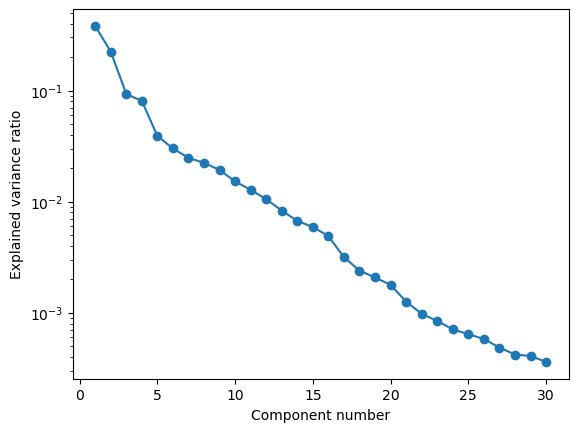

In [10]:
# Plot explained variance ratio
plt.semilogy(np.arange(1,pca.n_components+1),pca.explained_variance_ratio_,'-o')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component number')
plt.show()

In [16]:
print(f'Cumulative explained variance using 12 components: {np.sum(pca.explained_variance_ratio_[0:12])*100} %')

Cumulative explained variance using 12 components: 95.30308713732381 %


In [17]:
pca.explained_variance_ratio_

array([3.81215298e-01, 2.23834824e-01, 9.31656895e-02, 8.06425560e-02,
       3.91021479e-02, 3.00972719e-02, 2.48132855e-02, 2.23557892e-02,
       1.92959318e-02, 1.51889637e-02, 1.27945700e-02, 1.05245438e-02,
       8.32597902e-03, 6.70965721e-03, 5.92088178e-03, 4.90007076e-03,
       3.16700788e-03, 2.39919935e-03, 2.07933487e-03, 1.78481764e-03,
       1.25951922e-03, 9.80047397e-04, 8.44861426e-04, 7.09641839e-04,
       6.42423340e-04, 5.81768737e-04, 4.86388213e-04, 4.21264818e-04,
       4.09052365e-04, 3.61593670e-04])

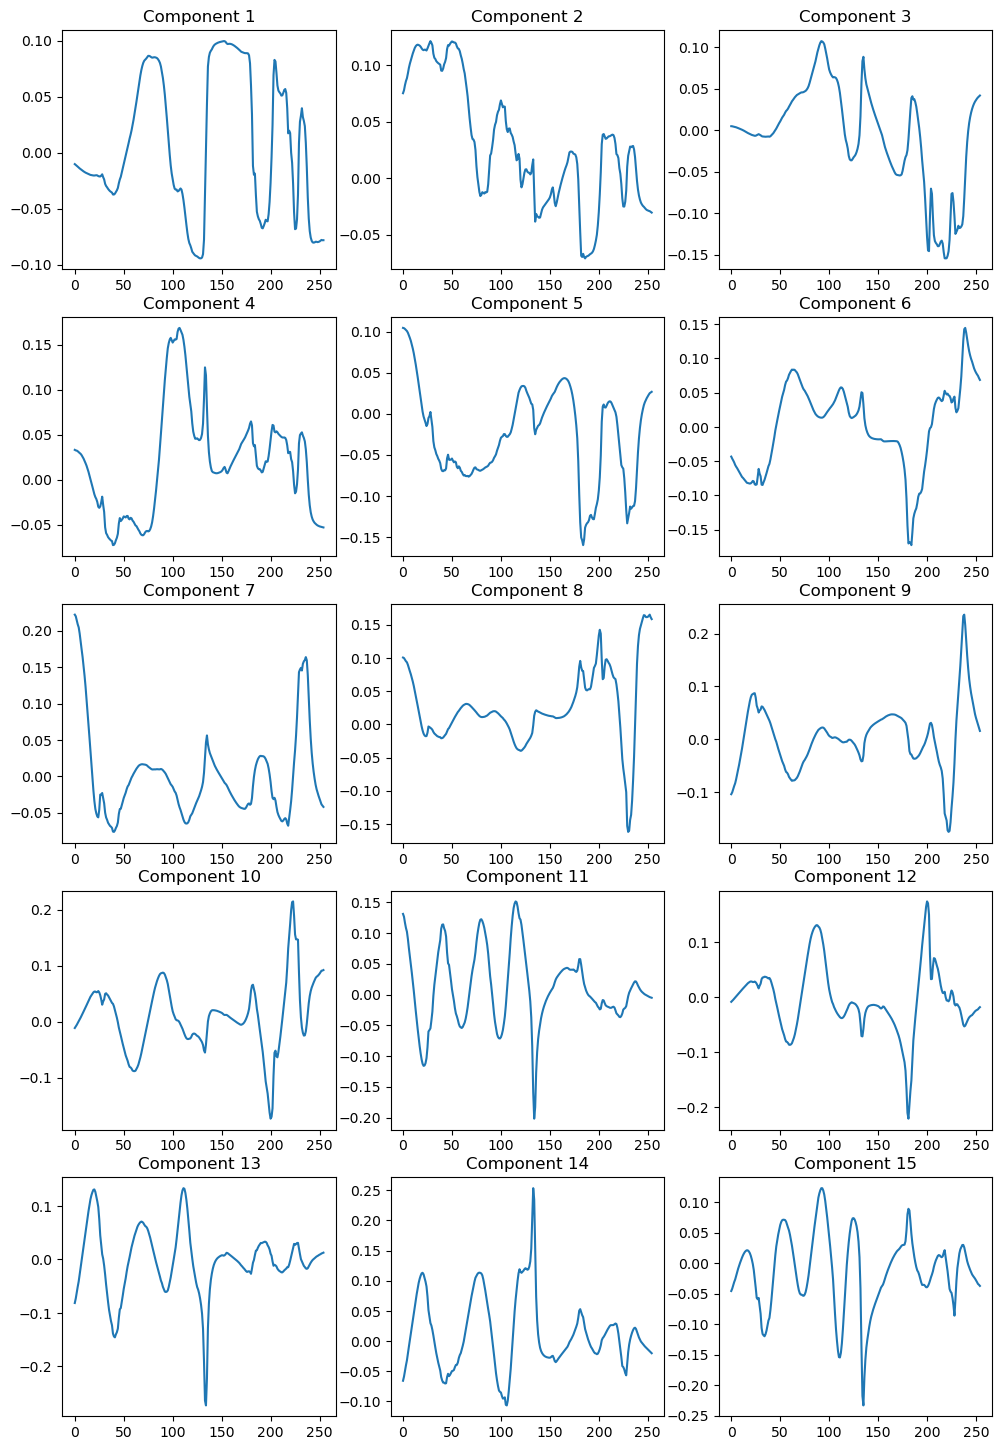

In [12]:
fig, ax = plt.subplots(nrows=5,ncols=3,figsize=(12,18))
for i,component in enumerate(pca.components_[0:15]):
    ax[i//3][i%3].plot(component)
    ax[i//3][i%3].title.set_text(f'Component {i+1}')

In [18]:
# Extract PCA matrix for first components only, and transpose (for later matrix multiplication)
n_comp = 12
pca_components = np.transpose(pca.components_[0:n_comp,:])

In [19]:
# Save to file
np.savez(pca_model_path,
         X_mean = scaler.mean_,
         X_std = scaler.scale_,
         pca_components = pca_components)

In [20]:
data = {}
with np.load(pca_model_path) as npz_files:
    print('Found the following Numpy arrays in the saved file:')
    for variable_name in npz_files.files:
        print(variable_name)
        data[variable_name] = npz_files[variable_name]

Found the following Numpy arrays in the saved file:
X_mean
X_std
pca_components
